# 데이터마이닝 HW02

Exercises for Classification

## 201822037 통계학과 한민주

## 1. LDA

두 범주(Yes , No)의 분산이 $\hat{\sigma}^2= 36$으로 동일하므로 LDA를 사용한다. 

$\pi_1 = 0.5 , \pi_2 = 0.5$ , $\mu_1 =0 , \mu_2 = 10$,  $f_k(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2}(\frac{x-\mu_k}{\sigma})^2}$

$P(Y=1 | X= 4) = \frac{\pi_2f_2(4)}{\pi_1f_1(4)+\pi_2f_2(4)}$

In [19]:
exp(-0.5*((4-10)/36)**2) ## 분자

[1] 0.9862071

In [20]:
exp(-0.5*((4-0)/36)**2) + exp(-0.5*((4-10)/36)**2) ## 분모

[1] 1.980053

In [21]:
0.986207116743916 / 1.98005329007036 ## P(Y=1 | X=4)

[1] 0.498071

작년 수익률이 X=4일 때, 이 회사가 배당금을 지급할 확률은 약 0.498이다.

In [80]:
library(tidyverse)
library(MASS) # for LDA


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select




## 2 Auto.csv

- 데이터 불러오기

In [157]:
Auto = read.csv("Auto.csv",stringsAsFactors=T)

- 데이터 확인

In [158]:
Auto %>% head

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<fct>,<int>,<dbl>,<int>,<int>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


- 결측치 없음

In [159]:
sum(is.na(Auto))  

[1] 0

#### (a) mpg01 변수 생성

In [161]:
Auto$mpg01 = ifelse(Auto$mpg>median(Auto$mpg) , 1,0)

- 확인

In [162]:
median(Auto$mpg)

[1] 23

In [339]:
Auto %>% head

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
,<dbl>,<int>,<dbl>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
2,15,8,350,165,3693,11.5,70,1,buick skylark 320,0
3,18,8,318,150,3436,11.0,70,1,plymouth satellite,0
4,16,8,304,150,3433,12.0,70,1,amc rebel sst,0
5,17,8,302,140,3449,10.5,70,1,ford torino,0
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500,0


#### (b) mpg01과 다른 변수들 사이의 관계 시각화

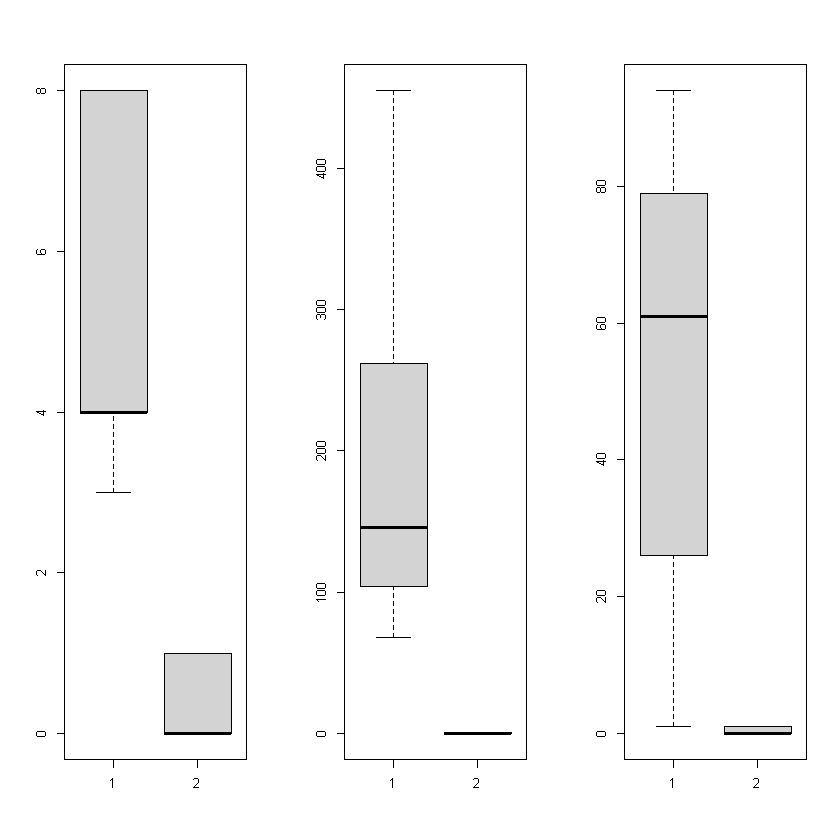

In [167]:
par(mfrow=c(1,3))
boxplot(Auto[,2], Auto[,10])
boxplot(Auto[,3], Auto[,10])
boxplot(Auto[,4], Auto[,10])

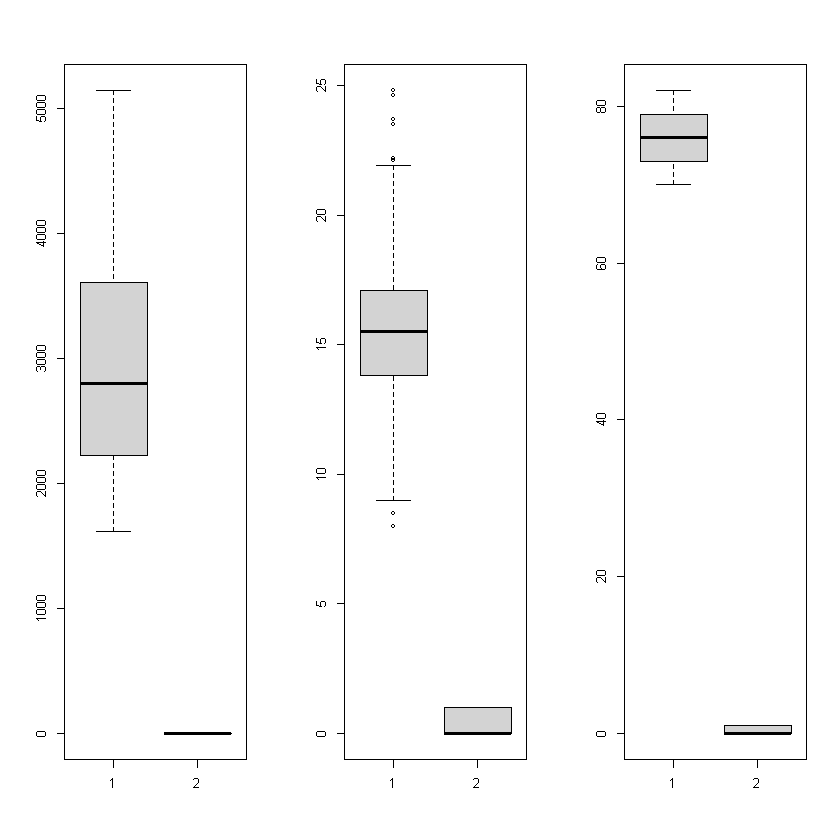

In [168]:
par(mfrow=c(1,3))
boxplot(Auto[,5], Auto[,10])
boxplot(Auto[,6], Auto[,10])
boxplot(Auto[,7], Auto[,10])

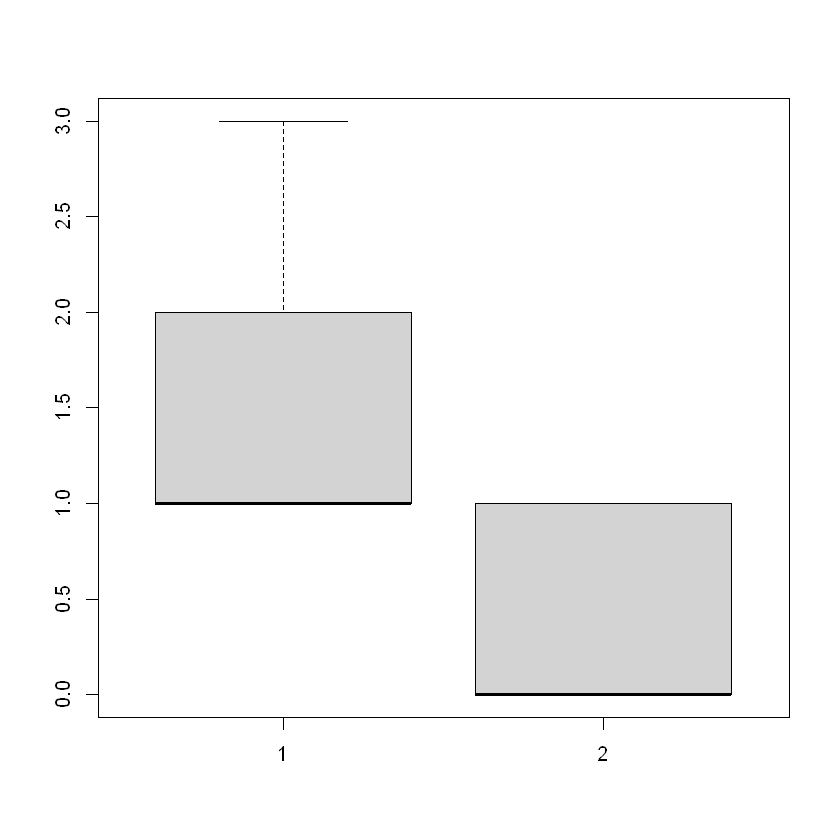

In [169]:
boxplot(Auto[,8], Auto[,10])

- 2,6,7번째 변수인 cylinders, acceleration, year변수가 mpg01을 예측하기에 가장 유용할 것 같다. mpg01의 두 범주 간 상자 그림의 거리가 가장 떨어져 있기 때문이다.

#### (c) training data 60% , test data 40%

In [295]:
Auto$mpg01 = as.factor(Auto$mpg01) # 종속 변수를 factor로 변환

In [296]:
train_index = sample(1:nrow(Auto), nrow(Auto)*0.6) 

In [297]:
train = Auto[train_index,]
test = Auto[-train_index,]

#### (d) 연관이 있다고 생각되는 변수들을 이용하여, mpg01을 예측하기 위한 LDA 수행 , test 오분류율은?

- LDA 모형 적합

In [175]:
lda = lda(mpg01 ~ cylinders + acceleration + year , data= Auto)

In [176]:
lda

Call:
lda(mpg01 ~ cylinders + acceleration + year, data = Auto)

Prior probabilities of groups:
        0         1 
0.5188917 0.4811083 

Group means:
  cylinders acceleration     year
0  6.669903     14.70243 74.38350
1  4.151832     16.47592 77.73298

Coefficients of linear discriminants:
                     LD1
cylinders    -0.85022976
acceleration -0.07569483
year          0.13091154

- 사전 확률이 약 0.52 , 0.48
- 각 설명변수에 대한 정규분포의 평균
- 판별 점수

In [177]:
table(test$mpg01 ,predict(lda,test)$class)

   
     0  1
  0 66 14
  1  2 77

In [178]:
mean(test$mpg01 != predict(lda,test)$class)

[1] 0.1006289

- test 오분류율 : 약 0.1

#### (e) 연관이 있다고 생각되는 변수들을 이용하여, mpg01을 예측하기 위한 QDA 수행 , test 오분류율은?

- QDA 모형 적합

In [179]:
qda = qda(mpg01 ~ cylinders + acceleration + year , data= Auto)

In [180]:
qda

Call:
qda(mpg01 ~ cylinders + acceleration + year, data = Auto)

Prior probabilities of groups:
        0         1 
0.5188917 0.4811083 

Group means:
  cylinders acceleration     year
0  6.669903     14.70243 74.38350
1  4.151832     16.47592 77.73298

- 사전확률 0.52 , 0.48
- 각 설명변수에 대한 정규분포의 평균

In [181]:
table(test$mpg01 ,predict(qda,test)$class)

   
     0  1
  0 68 12
  1  5 74

In [182]:
mean(test$mpg01 != predict(qda,test)$class)

[1] 0.1069182

- 1을 0으로, 0을 1로 오분류한 각각의 개수는 lda와 다르나 전체 오분류율은 lda와 0.107로 비슷하다.

#### (f) 연관이 있다고 생각되는 변수들을 이용하여, mpg01을 예측하기 위한 logistic regression 수행 , test 오분류율은?

- Logistic regression 모형 적합

In [298]:
glm = glm(mpg01 ~ cylinders + acceleration + year , data= train , family = binomial)

In [299]:
summary(glm)


Call:
glm(formula = mpg01 ~ cylinders + acceleration + year, family = binomial, 
    data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.58041  -0.39779  -0.06026   0.43731   2.83277  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -13.25604    4.82630  -2.747  0.00602 ** 
cylinders     -1.54450    0.20793  -7.428 1.10e-13 ***
acceleration  -0.01371    0.08805  -0.156  0.87623    
year           0.27750    0.06227   4.456 8.34e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 328.26  on 237  degrees of freedom
Residual deviance: 153.09  on 234  degrees of freedom
AIC: 161.09

Number of Fisher Scoring iterations: 6


- acceleration가 mpg01을 분류하기에 유의하지 않은 설명변수이다.

In [300]:
contrasts(Auto$mpg01) # 범주에 따른 값 확인

,1
0,0
1,1


- test data로 모형 적합치 확인

In [191]:
fitted.test = predict(glm,newdata=subset(test),type='response')
fitted.test = ifelse(fitted.test > 0.5,1,0)

In [195]:
tab = table(test$mpg01 ,fitted.test)
tab

   fitted.test
     0  1
  0 67 13
  1  7 72

In [199]:
(tab[1,2]+tab[2,1])/(tab[1,1]+tab[1,2]+tab[2,1]+tab[2,2])

[1] 0.1257862

- 오분류율은 약 0.126이다.

#### (g) 연관이 있다고 생각되는 변수들을 이용하여, mpg01을 예측하기 위한 KNN 수행 , test 오분류율은?

In [202]:
library(class)  ## for knn

- k=3일 때, KNN 모형에서 test data 적합치

In [247]:
fitted.test=knn(train[,c(2,6,7)], test[,c(2,6,7)],cl=train[,10], k=3,prob=T)

In [248]:
tab=table(test[,10],fitted.test)
tab

   fitted.test
     0  1
  0 70 10
  1  9 70

- k=3일 때, KNN 모형에서 test data 오분류율

In [249]:
(tab[1,2]+tab[2,1])/(tab[1,1]+tab[1,2]+tab[2,1]+tab[2,2])

[1] 0.1194969

- k=5일 때, KNN 모형에서 test data 적합치

In [250]:
fitted.test=knn(train[,c(2,6,7)], test[,c(2,6,7)],cl=train[,10], k=5,prob=T)

In [251]:
tab=table(test[,10],fitted.test)
tab

   fitted.test
     0  1
  0 68 12
  1  5 74

- k=5일 때, KNN 모형에서 test data 오분류율

In [253]:
(tab[1,2]+tab[2,1])/(tab[1,1]+tab[1,2]+tab[2,1]+tab[2,2])

[1] 0.1069182

- k=7일 때, KNN 모형에서 test data 적합치

In [254]:
fitted.test=knn(train[,c(2,6,7)], test[,c(2,6,7)],cl=train[,10], k=7,prob=T)

In [255]:
tab=table(test[,10],fitted.test)
tab

   fitted.test
     0  1
  0 68 12
  1  6 73

- k=7일 때, KNN 모형에서 test data 오분류율

In [256]:
(tab[1,2]+tab[2,1])/(tab[1,1]+tab[1,2]+tab[2,1]+tab[2,2])

[1] 0.1132075

- k=5일 때, 오분류율 값이 가장 작다.

### Boston.csv

- 데이터 불러오기

In [280]:
Boston = read.csv("Boston.csv" , stringsAsFactors=T)

In [281]:
Boston %>% head

,X,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
6,6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


- 결측치 없음

In [282]:
sum(is.na(Boston))

[1] 0

- 범주형 종속변수 생성

In [283]:
Boston$crim10 = ifelse(Boston$crim >= median(Boston$crim),1,0 )

In [289]:
Boston$crim10 = as.factor(Boston$crim10) # 종속 변수를 factor로 변환

In [284]:
Boston = Boston[,-c(1,2)] # index 변수, crim변수 삭제

In [290]:
Boston %>% head

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,crim10
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
1,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
2,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
3,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,0
4,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,0
5,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,0
6,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0


- training data 60% , test data 40%

In [301]:
train_index = sample(1:nrow(Boston), nrow(Boston)*0.6) 

In [302]:
train = Boston[train_index,]
test = Boston[-train_index,]

#### Logistic regression

- Logistic regression 모형 적합

In [303]:
glm = glm(crim10 ~. , data = train, family = 'binomial')

In [304]:
summary(glm)


Call:
glm(formula = crim10 ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0342  -0.1478  -0.0018   0.0031   3.4733  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -41.731585   8.676565  -4.810 1.51e-06 ***
zn           -0.068154   0.046403  -1.469  0.14190    
indus        -0.013343   0.057310  -0.233  0.81590    
chas         -0.020520   1.124578  -0.018  0.98544    
nox          50.834178  10.142195   5.012 5.38e-07 ***
rm           -0.572121   1.004998  -0.569  0.56917    
age           0.026371   0.015854   1.663  0.09624 .  
dis           0.748767   0.287784   2.602  0.00927 ** 
rad           0.624953   0.208922   2.991  0.00278 ** 
tax          -0.004858   0.003788  -1.283  0.19961    
ptratio       0.375000   0.161740   2.319  0.02042 *  
lstat         0.065043   0.062437   1.042  0.29753    
medv          0.184014   0.097505   1.887  0.05913 .  
---
Signif. codes:  0 '***' 0.001

- 유의하지 않은 변수 제거

In [305]:
new_glm = step(glm)

Start:  AIC=151.51
crim10 ~ zn + indus + chas + nox + rm + age + dis + rad + tax + 
    ptratio + lstat + medv

          Df Deviance    AIC
- chas     1   125.51 149.51
- indus    1   125.56 149.56
- rm       1   125.83 149.83
- lstat    1   126.58 150.59
- tax      1   127.17 151.18
<none>         125.50 151.50
- zn       1   128.43 152.43
- age      1   128.45 152.45
- medv     1   129.40 153.40
- ptratio  1   131.39 155.39
- dis      1   133.42 157.42
- rad      1   141.77 165.77
- nox      1   174.56 198.56

Step:  AIC=149.51
crim10 ~ zn + indus + nox + rm + age + dis + rad + tax + ptratio + 
    lstat + medv

          Df Deviance    AIC
- indus    1   125.56 147.56
- rm       1   125.84 147.84
- lstat    1   126.58 148.59
- tax      1   127.18 149.18
<none>         125.51 149.51
- zn       1   128.44 150.44
- age      1   128.47 150.47
- medv     1   129.45 151.45
- ptratio  1   131.50 153.50
- dis      1   133.42 155.42
- rad      1   141.80 163.80
- nox      1   174.82 196.82


In [306]:
summary(new_glm)


Call:
glm(formula = crim10 ~ zn + nox + age + dis + rad + tax + ptratio + 
    medv, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8697  -0.1896  -0.0025   0.0039   3.4372  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -39.692359   7.725756  -5.138 2.78e-07 ***
zn           -0.063598   0.042880  -1.483  0.13803    
nox          48.136497   8.854373   5.436 5.43e-08 ***
age           0.026799   0.013404   1.999  0.04557 *  
dis           0.673997   0.266014   2.534  0.01129 *  
rad           0.618560   0.199008   3.108  0.00188 ** 
tax          -0.005698   0.003629  -1.570  0.11635    
ptratio       0.317848   0.137632   2.309  0.02092 *  
medv          0.100200   0.044276   2.263  0.02363 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 419.49  on 302  degrees of freedom
Residual deviance: 1

In [308]:
contrasts(Boston$crim10) # 범주에 따른 값 확인

,1
0,0
1,1


- test data로 모형 적합치 확인

In [309]:
fitted.test = predict(new_glm,newdata=subset(test),type='response')
fitted.test = ifelse(fitted.test > 0.5,1,0)

In [310]:
tab = table(test$crim10 ,fitted.test)
tab

   fitted.test
     0  1
  0 84 11
  1 13 95

In [311]:
(tab[1,2]+tab[2,1])/(tab[1,1]+tab[1,2]+tab[2,1]+tab[2,2])

[1] 0.1182266

- 오분류율은 약 0.12이다.

#### LDA

- LDA 모형 적합

In [313]:
lda = lda(crim10 ~. , data= Boston)

In [314]:
lda

Call:
lda(crim10 ~ ., data = Boston)

Prior probabilities of groups:
  0   1 
0.5 0.5 

Group means:
         zn     indus       chas       nox       rm      age      dis       rad
0 21.525692  7.002292 0.05138340 0.4709711 6.394395 51.31028 5.091596  4.158103
1  1.201581 15.271265 0.08695652 0.6384190 6.174874 85.83953 2.498489 14.940711
       tax  ptratio     lstat     medv
0 305.7431 17.90711  9.419486 24.94941
1 510.7312 19.00395 15.886640 20.11621

Coefficients of linear discriminants:
                  LD1
zn      -0.0053148532
indus    0.0130577992
chas    -0.0730621890
nox      8.1768734308
rm       0.1163174910
age      0.0109686800
dis      0.0373506901
rad      0.0758790405
tax     -0.0008607417
ptratio  0.0456052636
lstat    0.0166777032
medv     0.0348732607

- 사전 확률이 0.5 , 0.5
- 각 설명변수에 대한 정규분포의 평균
- 판별 점수

In [315]:
table(test$crim10 ,predict(lda,test)$class)

   
     0  1
  0 88  7
  1 27 81

In [316]:
mean(test$crim10 != predict(lda,test)$class)

[1] 0.1674877

- 오분류율이 약 0.17이다.

In [317]:
lda = lda(crim10 ~zn + nox +age + dis + rad + tax + ptratio + medv, data= Boston)

In [318]:
lda

Call:
lda(crim10 ~ zn + nox + age + dis + rad + tax + ptratio + medv, 
    data = Boston)

Prior probabilities of groups:
  0   1 
0.5 0.5 

Group means:
         zn       nox      age      dis       rad      tax  ptratio     medv
0 21.525692 0.4709711 51.31028 5.091596  4.158103 305.7431 17.90711 24.94941
1  1.201581 0.6384190 85.83953 2.498489 14.940711 510.7312 19.00395 20.11621

Coefficients of linear discriminants:
                  LD1
zn      -0.0049507198
nox      8.3384571768
age      0.0124096276
dis      0.0214232184
rad      0.0753431526
tax     -0.0005730698
ptratio  0.0448838770
medv     0.0317835334

In [319]:
table(test$crim10 ,predict(lda,test)$class)

   
     0  1
  0 91  4
  1 27 81

In [320]:
mean(test$crim10 != predict(lda,test)$class)

[1] 0.1527094

- 로지스틱 회귀분석에서 유의하지 않았던 설명변수를 제거하고 모형을 다시 적합했을 때, test data의 오분류율이 약 0.15로 full LDA 모형보다 줄어들었다. 

#### KNN

- k=3일 때, KNN 모형에서 test data 적합치

In [329]:
fitted.test=knn(train[,-13], test[,-13],cl=train[,13], k=3,prob=T)

In [330]:
tab=table(test[,13],fitted.test)
tab

   fitted.test
     0  1
  0 88  7
  1 11 97

- k=3일 때, KNN 모형에서 test data 오분류율

In [331]:
(tab[1,2]+tab[2,1])/(tab[1,1]+tab[1,2]+tab[2,1]+tab[2,2])

[1] 0.08866995

- k=5일 때, KNN 모형에서 test data 적합치

In [332]:
fitted.test=knn(train[,-13], test[,-13],cl=train[,13], k=5,prob=T)

In [333]:
tab=table(test[,13],fitted.test)
tab

   fitted.test
     0  1
  0 88  7
  1 11 97

- k=5일 때, KNN 모형에서 test data 오분류율

In [334]:
(tab[1,2]+tab[2,1])/(tab[1,1]+tab[1,2]+tab[2,1]+tab[2,2])

[1] 0.08866995

- k=7일 때, KNN 모형에서 test data 적합치

In [336]:
fitted.test=knn(train[,-13], test[,-13],cl=train[,13], k=7,prob=T)

In [337]:
tab=table(test[,13],fitted.test)
tab

   fitted.test
     0  1
  0 86  9
  1 11 97

- k=7일 때, KNN 모형에서 test data 오분류율

In [338]:
(tab[1,2]+tab[2,1])/(tab[1,1]+tab[1,2]+tab[2,1]+tab[2,2])

[1] 0.09852217

- k=3일 때, 오분류율 값이 가장 작으면서, 모형 복잡도도 작다.

- Logistic regression , LDA , KNN 중에서 오분류율이 가장 작은 모형이 KNN이므로 어떤 지역의 범죄율이 중앙값 이상인지 아닌지를 예측하기 위한 분류 모형으로 가장 적합한 거 같다.